In [6]:
from data import Data
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [7]:
data = Data(0.01,1000,0.2)
X, Y = data[150]
X = X.unsqueeze(-1)
Y = Y
print(X.shape,Y.shape)

torch.Size([850, 150, 1]) torch.Size([850, 1])


In [46]:
data_sin = Data(0.01,1000,0.)
X_sin, Y_sin = data[150]
X_sin = X_sin.unsqueeze(-1)

X_n = X - X_sin
Y_n = Y - Y_sin

In [66]:
ds_sin = TensorDataset(X_sin,Y_sin)
dl_sin = DataLoader(ds_sin,batch_size=100,shuffle=False)

ds_n = TensorDataset(X_n,Y_n)
dl_n = DataLoader(ds_n,batch_size=100, shuffle=False)

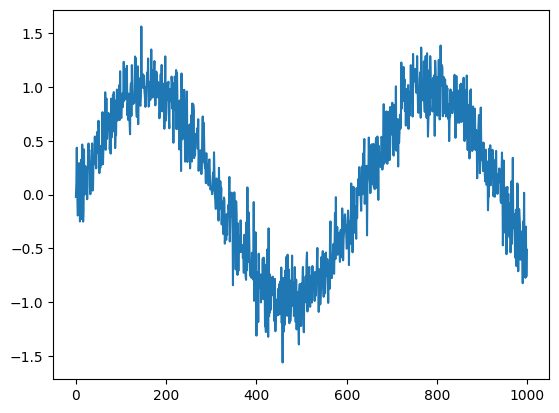

In [8]:
plt.plot(data.x)

In [9]:
ds = TensorDataset(X,Y)
dl = DataLoader(ds,batch_size=100, shuffle=False)

In [40]:
class LSTM_model(nn.Module):
    def __init__(self, num_inputs, num_hiddens,num_layers=1,num_out=1):
        super().__init__()
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
        self.lstm = nn.LSTM(num_inputs, num_hiddens, batch_first=True)
        self.linear = nn.Linear(num_hiddens, num_out)
    def forward(self, X, H, c):
        state, (H,c) = self.lstm(X,(H,c)) # size
        pred = self.linear(H[0]) #checked! H[0]=state[:,-1,:]
        return pred # size = (batch_size, 1)

In [71]:
def lstm_train(model, dl, optimizer, loss, hidden_size, device = 'cpu'):
    total_loss = 0
    for X, Y in dl:
        model.train()
        X, Y = X.to(device), Y.to(device)
        H = torch.zeros(1,X.shape[0],hidden_size)
        c = torch.zeros(1,X.shape[0],hidden_size)
        Y_hat = model(X,H,c)
        batch_loss = loss(Y_hat,Y)
        batch_loss.backward()
        optimizer.step()
        total_loss += batch_loss.detach()
    total_loss = torch.sqrt(total_loss/len(ds))
    if epoch %100 ==0:
        print(total_loss) # MSE loss

In [73]:
hidden_size = 50
mse_loss = nn.MSELoss(reduction='sum')
lstm_model = LSTM_model(1,hidden_size,num_layers=3)
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-5)
for epoch in range(50000):
    if epoch < 5000:
        dl_act = dl_sin
    else:
        dl_act = dl
    lstm_train(lstm_model, dl_act, optimizer, mse_loss, hidden_size)

tensor(0.7198)
tensor(0.6154)
tensor(0.3995)
tensor(0.3411)
tensor(0.2473)
tensor(0.2492)
tensor(0.2140)
tensor(0.2253)
tensor(0.2222)
tensor(0.2146)
tensor(0.2216)
tensor(0.2199)
tensor(0.2194)
tensor(0.2209)
tensor(0.2216)
tensor(0.2214)
tensor(0.2211)


KeyboardInterrupt: 

In [59]:
a.shape, data_sin.x[150:].shape

(torch.Size([850, 1]), torch.Size([850]))

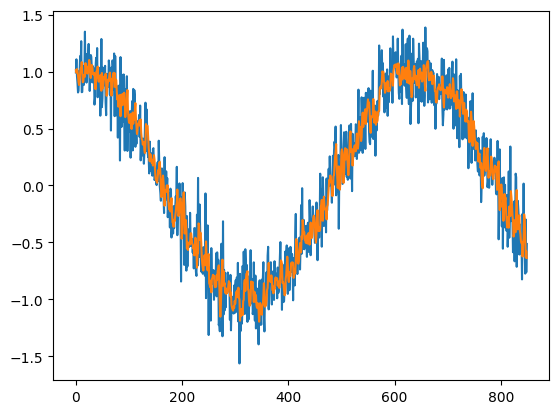

In [75]:
H = torch.zeros(1,850,50)
c = torch.zeros(1,850,50)
a = lstm_model(X,H,c).detach()
plt.plot(data.x[150:])
plt.plot((a.reshape(850)))

In [64]:
mse_loss((a.reshape(850)+data_sin.x[150:]),data.x[150:])

tensor(32.0997)